# Analyzing Weather Data from OpenWeather.org

For this project, I analyzed weather data sourced from OpenWeather.org. This endeavor aimed to showcase my proficiency in data analysis, visualization, and communication of insights. I began by setting up my Python environment, leveraging essential libraries like requests, pandas, and matplotlib to ensure smooth data retrieval, manipulation, and visualization.

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

To access the wealth of weather data provided by OpenWeather.org, I secured an API key. This unique identifier grants me the necessary authorization to query their API and obtain real-time weather information. Acquiring this API key involved registering on OpenWeather.org's platform.

Additionally, as it's important to keep it private, I placed it in a local file and used an environment variable to reference it throughout the project.

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.environ.get('OPENWEATHER_API_KEY')
city = 'Miami'
country_code = 'us'

In [6]:
# Forecast data
url = f'http://api.openweathermap.org/data/2.5/forecast?q={city},{country_code}&cnt=40&appid={api_key}'
response = requests.get(url)
data = response.json()

By querying OpenWeather.org's API, I retrieved a 5-day forecast for Miami. This resulted in a JSON object containing a wealth of information about the upcoming weather. I then extracted key metrics such as temperature, humidity, and weather descriptions.

In [7]:
forecast_list = data['list']

# Initializing lists to store data
timestamps = []
temperatures = []
humidities = []
weather_descriptions = []

# Extracting data
for entry in forecast_list:
    timestamps.append(entry['dt'])
    temperatures.append(entry['main']['temp'])
    humidities.append(entry['main']['humidity'])
    weather_descriptions.append(entry['weather'][0]['description'])

# Creating a DataFrame to organize this data for further analysis and visualization
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature (K)': temperatures,
    'Humidity (%)': humidities,
    'Weather': weather_descriptions
})

df.head()

,Timestamp,Temperature (K),Humidity (%),Weather
0,1696021200,300.97,77,light rain
1,1696032000,301.64,73,light rain
2,1696042800,301.94,71,light rain
3,1696053600,302.24,71,few clouds
4,1696064400,301.93,74,few clouds


### Clean and Explore Data

Before visualization, I took a moment to preprocess the data. This involved converting temperature from Kelvin to Celsius for easier interpretation. Additionally, I explored the dataset to understand the nature and scope of the information I had gathered.

In [8]:
# Convert temperature from Kelvin to Celsius
df['Temperature (C)'] = df['Temperature (K)'] - 273.15

# Explore the dataset
print(df.head())

    Timestamp  Temperature (K)  Humidity (%)     Weather  Temperature (C)
0  1696021200           300.97            77  light rain            27.82
1  1696032000           301.64            73  light rain            28.49
2  1696042800           301.94            71  light rain            28.79
3  1696053600           302.24            71  few clouds            29.09
4  1696064400           301.93            74  few clouds            28.78


### Visualize the Data

With the data organized, it was time to breathe life into it through visualizations. I began with a line chart to display the temperature trends over the 5-day period.

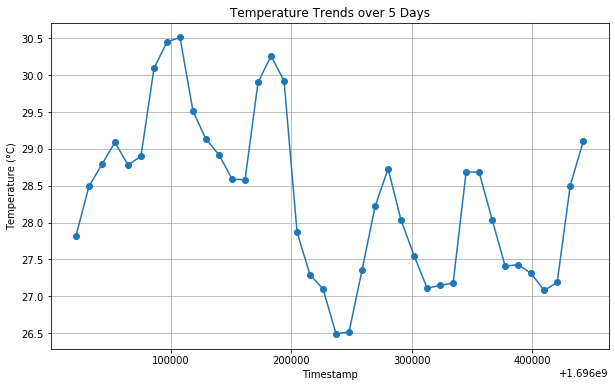

In [9]:
# Plotting temperature trends
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Temperature (C)'], marker='o')
plt.title('Temperature Trends over 5 Days')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

Additionally, I created a histogram to provide insights into the distribution of humidity levels over this period.

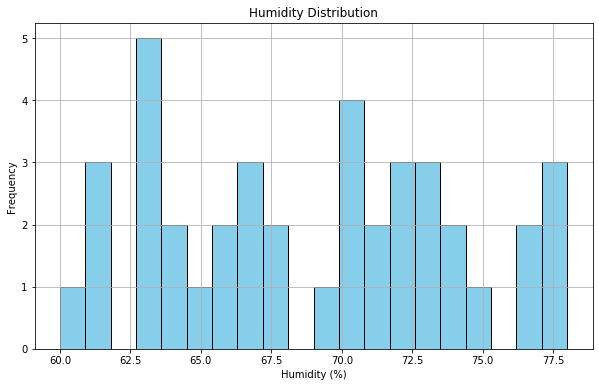

In [10]:
# Plotting histogram for humidity distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Humidity (%)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In this phase, I meticulously documented my analysis. I began by providing context about the data source and the objectives of the project. I then detailed the steps taken in each phase, from data retrieval to visualization. Additionally, I highlighted key observations and insights gleaned from the weather data.

### Conclusion

In this analysis, I retrieved weather data from OpenWeather.org for Miami. After obtaining the data, I performed data cleaning to convert temperatures from Kelvin to Celsius for better understanding.

The visualizations I created gave a clear overview of the forecasted temperature and humidity levels. These insights can be used to draw conclusions about the future weather conditions in Miami.


### Additional

This project complements the Django web app I created written in Python that shows current weather conditions, 48-hour and 7-day forecasts, local radar, and more for a user inputted location. View it [here](https://www.weather-forecast-ericnbello.herokuapp.com).